In [1]:
%matplotlib inline

from absorbed_dose_lib import *

In [2]:
# Define our materials:
paraffin = Material(name="Paraffin_Wax", density=0.9, stopping_power="file", file="./paraffin_proton_stopping_data.csv")
water = Material(name="Water", density=0.997, stopping_power="file", file="./water_proton_stopping_data.csv")

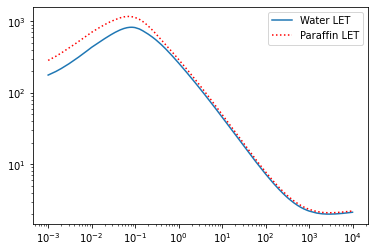

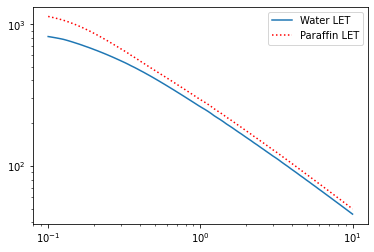

In [3]:
# Some plots
plt.loglog(water.energies, water.stopping_power(water.energies), label="Water LET")
plt.loglog(paraffin.energies, paraffin.stopping_power(paraffin.energies), "r:", label="Paraffin LET")
plt.legend()
plt.show()

my_energies = np.logspace(-1.0, 1.0, 100 )
plt.loglog(my_energies, water.stopping_power(my_energies), label="Water LET")
plt.loglog(my_energies, paraffin.stopping_power(my_energies), "r:", label="Paraffin LET")
plt.legend()
plt.show()

In [4]:
# My Experiment
paraffin_layer = GeometricalElement(name="Paraffin", length=20.0*micrometer, material=paraffin, color='y')
cell_layer = GeometricalElement(name="Cells", length=10.0*micrometer, material=water, color='m')


Paraffin 20.0 micrometers
Cells 10.0 micrometers
Total Length:  30.0 micrometers
dx =  3e-07
Paraffin 6666 points.
Cells 3333 points.

---------------------------------------
Paraffin recibed a dose of 2.218570538556518 Gy per nA per second
Cells recibed a dose of 1.6718836259120078 Gy per nA per second
---------------------------------------


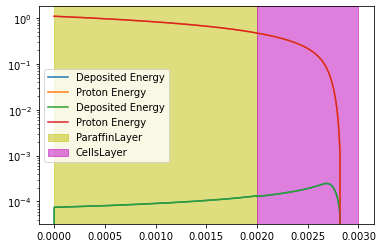

In [5]:
my_beam = Beam(energy=1.1, intensity=1.0, diameter=6.0)
my_experiment = Experiment(name="Paraffin and Cells", beam=my_beam, elements=[paraffin_layer, cell_layer])
my_experiment.compute(10000)
my_experiment.show_results()
#my_experiment.save_results(outputfile="./results.txt")